# Description

Running XGBoost and TabNet on the Adult Income dataset

In [1]:
!pip install category_encoders
!pip install pytorch_tabnet

     |████████████████████████████████| 81kB 4.6MB/s 


In [2]:
from category_encoders import LeaveOneOutEncoder
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from pytorch_tabnet.tab_model import TabNetRegressor, TabNetClassifier

import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
np.random.seed(0)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# TabNet

In [3]:

df = pd.read_csv('https://docs.google.com/uc?id=10eFO2rVlsQBUffn0b7UCAp28n0mkLCy7&export=download')

labels = df.pop('<=50K')
class_to_int = {c: i for i, c in enumerate(labels.unique())}   
labels = [class_to_int[v] for v in labels]  

X_train, X_val, y_train_int, y_val_int = train_test_split(df, labels, test_size=0.2)

cat_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
#categorical_dims = dict()


display(X_train)
tmp = X_train.copy()
cat_encoder = LeaveOneOutEncoder()
cat_encoder.fit(X_train[cat_features], y_train_int)
X_train[cat_features] = cat_encoder.transform(X_train[cat_features])
X_val[cat_features] = cat_encoder.transform(X_val[cat_features])



display(X_train)
X_train = X_train.values.astype('float32')
X_val = X_val.values.astype('float32')
y_train = np.array(y_train_int)
y_val = np.array(y_val_int)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
15282,36,Private,174308,11th,7,Divorced,Transport-moving,Not-in-family,White,Male,0,0,40,United-States
24870,35,Private,198202,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,54,United-States
18822,38,Private,52963,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,50,United-States
26404,50,Private,138270,HS-grad,9,Married-civ-spouse,Sales,Wife,Black,Female,0,0,40,United-States
7842,68,Self-emp-not-inc,116903,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2149,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,43,Local-gov,33331,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
19648,44,Private,98466,10th,6,Never-married,Farming-fishing,Unmarried,White,Male,0,0,35,United-States
9845,23,Private,45317,Some-college,10,Separated,Sales,Own-child,White,Female,0,0,40,United-States
10799,45,Local-gov,215862,Doctorate,16,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,45,United-States


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
15282,36,0.216999,174308,0.046739,7,0.102637,0.203162,0.100709,0.254738,0.305831,0,0,40,0.24511
24870,35,0.216999,198202,0.159290,9,0.044455,0.484047,0.100709,0.254738,0.105960,0,0,54,0.24511
18822,38,0.216999,52963,0.418435,13,0.044455,0.132589,0.100709,0.254738,0.105960,0,0,50,0.24511
26404,50,0.216999,138270,0.159290,9,0.447245,0.269310,0.470973,0.123618,0.105960,0,0,40,0.24511
7842,68,0.286280,116903,0.251351,11,0.447245,0.447449,0.449796,0.254738,0.305831,0,2149,40,0.24511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,43,0.305307,33331,0.556577,14,0.447245,0.484047,0.449796,0.254738,0.305831,0,0,40,0.24511
19648,44,0.216999,98466,0.063830,6,0.044455,0.119647,0.061982,0.254738,0.305831,0,0,35,0.24511
9845,23,0.216999,45317,0.188957,10,0.071166,0.269310,0.013000,0.254738,0.105960,0,0,40,0.24511
10799,45,0.305307,215862,0.748366,16,0.447245,0.484047,0.449796,0.254738,0.305831,7688,0,45,0.24511


In [4]:
classifier = TabNetClassifier(verbose=1,seed=42,n_a=16, n_d=16, lambda_sparse=0.0001, n_steps=5, gamma=1.5)
classifier.fit(X_train=X_train, y_train=y_train,
               patience=0, max_epochs=1000,
               eval_set = [(X_train, y_train), (X_val, y_val)],
               eval_metric=['logloss', 'accuracy'], batch_size=4096, virtual_batch_size=128,
               )



Device used : cuda
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 0.60352 | val_0_logloss: 2.39238 | val_0_accuracy: 0.69311 | val_1_logloss: 2.51005 | val_1_accuracy: 0.692   |  0:00:01s
epoch 1  | loss: 0.40924 | val_0_logloss: 1.3529  | val_0_accuracy: 0.31726 | val_1_logloss: 1.34201 | val_1_accuracy: 0.32351 |  0:00:03s
epoch 2  | loss: 0.37263 | val_0_logloss: 1.00271 | val_0_accuracy: 0.7262  | val_1_logloss: 1.00063 | val_1_accuracy: 0.72179 |  0:00:04s
epoch 3  | loss: 0.3625  | val_0_logloss: 0.51972 | val_0_accuracy: 0.78947 | val_1_logloss: 0.52131 | val_1_accuracy: 0.78704 |  0:00:06s
epoch 4  | loss: 0.35441 | val_0_logloss: 0.62243 | val_0_accuracy: 0.65621 | val_1_logloss: 0.62483 | val_1_accuracy: 0.65269 |  0:00:07s
epoch 5  | loss: 0.35758 | val_0_logloss: 0.65353 | val_0_accuracy: 0.62412 | val_1_logloss: 0.66082 | val_1_accuracy: 0.61907 |  0:00:09s
epoch 6  | loss: 0.35837 | val_0_logloss: 0.46857 | val_0_accuracy: 0.8002

In [5]:
predictions = classifier.predict_proba(X_val)[:,1]
print(predictions, y_val)
valid_auc = roc_auc_score(y_score=predictions, y_true=y_val)
predictions[predictions > 0.5] = 1
predictions[predictions <= 0.5] = 0
#, y_valpredictions

[0.00208054 0.02692678 0.23382546 ... 0.7816354  0.01153127 0.4787306 ] [0 0 0 ... 1 0 1]


In [6]:
print('Accuracy', sum(predictions==y_val)/len(y_val))
print('Validation AUC', valid_auc)

Accuracy 0.8452326116996776
Validation AUC 0.9008879160552815


In [67]:
tabnet_losses = pd.concat([pd.Series(classifier.history['val_0_logloss']), pd.Series(classifier.history['val_1_logloss'])], keys=['Train NLL (TabNet)', 'Test NLL (TabNet)'], axis=1)
tabnet_errors = pd.concat([pd.Series(classifier.history['val_0_accuracy']), pd.Series(classifier.history['val_1_accuracy'])], keys=['Train Accuracy (TabNet)', 'Test Accuracy (TabNet)'], axis=1)

display(tabnet_losses)
display(tabnet_errors)

tabnet_losses.to_csv('tabnet_losses.csv')
tabnet_errors.to_csv('tabnet_errors.csv')

,Train NLL (TabNet),Test NLL (TabNet)
0,2.392376,2.510049
1,1.352902,1.342009
2,1.002709,1.000628
3,0.519722,0.521311
4,0.622428,0.624832
...,...,...
995,0.281892,0.325482
996,0.285843,0.331290
997,0.283058,0.327917
998,0.280189,0.328788


,Train Accuracy (TabNet),Test Accuracy (TabNet)
0,0.693105,0.692001
1,0.317260,0.323507
2,0.726198,0.721787
3,0.789466,0.787041
4,0.656212,0.652695
...,...,...
995,0.869357,0.847843
996,0.867399,0.845847
997,0.868704,0.846461
998,0.870700,0.846461


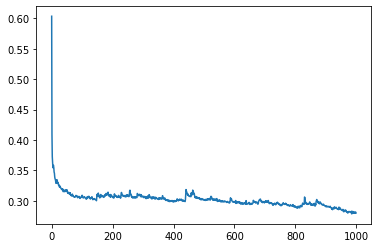

In [21]:
from matplotlib import pyplot as plt
plt.plot(classifier.history['loss'])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text major ticklabel objects>)

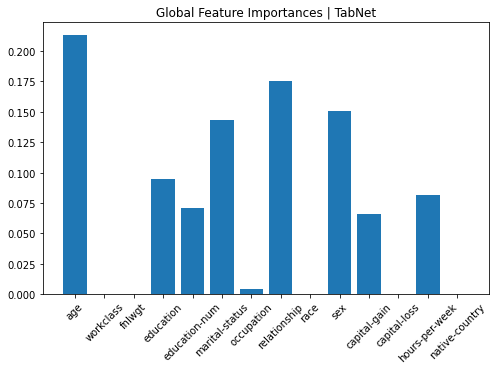

In [34]:
plt.figure(figsize = (8, 5))
plt.bar(x=df.columns, height=classifier.feature_importances_)
plt.title('Global Feature Importances | TabNet')
plt.xticks(rotation=45)

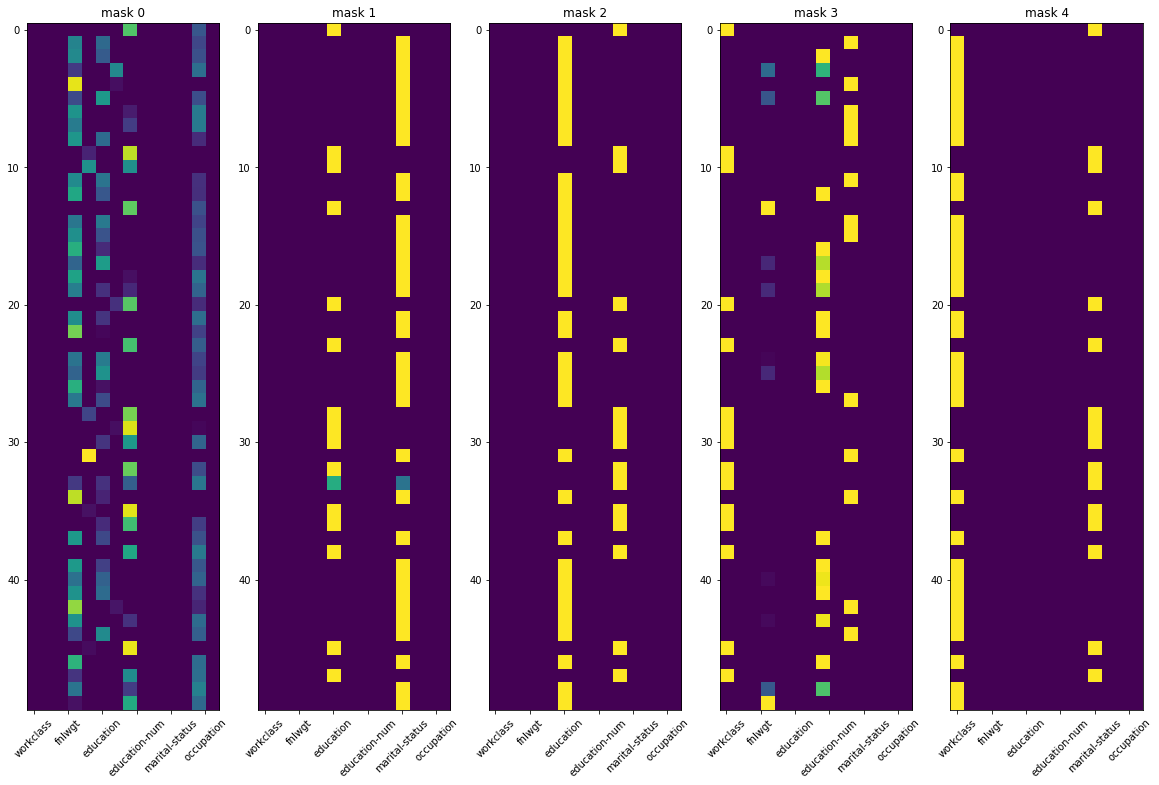

In [49]:
explain_matrix, masks = classifier.explain(X_val)
fig, axs = plt.subplots(1, 5, figsize=(20,20))

for i in range(5):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")
    axs[i].set_xticklabels(list(df.columns), rotation=45)

In [50]:
import pickle
with open('tabnet_trained_adult_income.pkl', 'wb') as output:
  pickle.dump(classifier, output, pickle.HIGHEST_PROTOCOL)

In [51]:
with open('tabnet_trained_adult_income.pkl', 'rb') as input:
    model = pickle.load(input)

In [52]:
masks.keys()

dict_keys([0, 1, 2, 3, 4])

# XGB

In [56]:
from xgboost import XGBClassifier

clf_xgb = XGBClassifier(max_depth=8,
    learning_rate=0.1,
    n_estimators=1000,
    verbosity=0,
    silent=None,
    objective='binary:logistic',
    booster='gbtree',
    n_jobs=-1,
    nthread=None,
    gamma=0,
    min_child_weight=1,
    max_delta_step=0,
    subsample=0.7,
    colsample_bytree=1,
    colsample_bylevel=1,
    colsample_bynode=1,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    base_score=0.5,
    random_state=0,
    seed=None,)


#For next time if we want val losses for every epoch use the eval_set flag

clf_xgb.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_val, y_val)],
        early_stopping_rounds=7000,
        verbose=10,
        eval_metric=['logloss', 'error'])

[0]	validation_0-logloss:0.634358	validation_0-error:0.133676	validation_1-logloss:0.636422	validation_1-error:0.148319
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 7000 rounds.
[10]	validation_0-logloss:0.37336	validation_0-error:0.126382	validation_1-logloss:0.386756	validation_1-error:0.137264
[20]	validation_0-logloss:0.300571	validation_0-error:0.122313	validation_1-logloss:0.321887	validation_1-error:0.138799
[30]	validation_0-logloss:0.273074	validation_0-error:0.118243	validation_1-logloss:0.299993	validation_1-error:0.135882
[40]	validation_0-logloss:0.259453	validation_0-error:0.114519	validation_1-logloss:0.292238	validation_1-error:0.133886
[50]	validation_0-logloss:0.251506	validation_0-error:0.111755	validation_1-logloss:0.289106	validation_1-error:0.132197
[60]	validation_0-logloss:0.244389	validation_0-error:0.107955	validation_1-logloss:0.287085	validation_1-error:0

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=0)

In [57]:
preds = np.array(clf_xgb.predict_proba(X_val))
valid_auc = roc_auc_score(y_score=preds[:,1], y_true=y_val)
print('Validation AUC', valid_auc)

preds = preds[:, 1]
preds[preds > 0.5] = 1
preds[preds <= 0.5] = 0
print('Accuracy', sum(preds==y_val)/len(y_val))

Validation AUC 0.925226887092518
Accuracy 0.8688776293566712


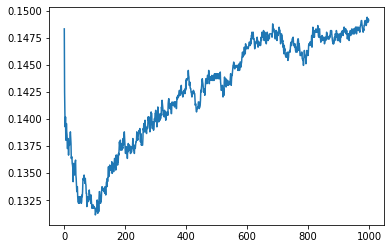

In [61]:
plt.plot(clf_xgb.evals_result()['validation_1']['error'])
plt.show()

In [68]:
xgb_boost_losses = pd.concat([pd.Series(clf_xgb.evals_result()['validation_0']['logloss']), pd.Series(clf_xgb.evals_result()['validation_1']['logloss'])], keys=['Train NLL (XGB)', 'Test NLL (XGB)'], axis=1)
xgb_boost_errors = pd.concat([1 - pd.Series(clf_xgb.evals_result()['validation_0']['error']), 1 - pd.Series(clf_xgb.evals_result()['validation_1']['error'])], keys=['Train Accuracy (XGB)', 'Test Accuracy (XGB)'], axis=1)

display(xgb_boost_losses)
display(xgb_boost_errors)

xgb_boost_losses.to_csv('xgb_losses.csv')
xgb_boost_errors.to_csv('xgb_errors.csv')

,Train NLL (XGB),Test NLL (XGB)
0,0.634358,0.636422
1,0.586087,0.589645
2,0.545698,0.550803
3,0.511851,0.518381
4,0.482911,0.490577
...,...,...
995,0.054475,0.373795
996,0.054441,0.373818
997,0.054349,0.374002
998,0.054265,0.374106


,Train Accuracy (XGB),Test Accuracy (XGB)
0,0.866324,0.851681
1,0.868896,0.857516
2,0.870086,0.859512
3,0.871084,0.860740
4,0.871890,0.859819
...,...,...
995,0.997082,0.850760
996,0.997159,0.850914
997,0.997351,0.851067
998,0.997274,0.850760


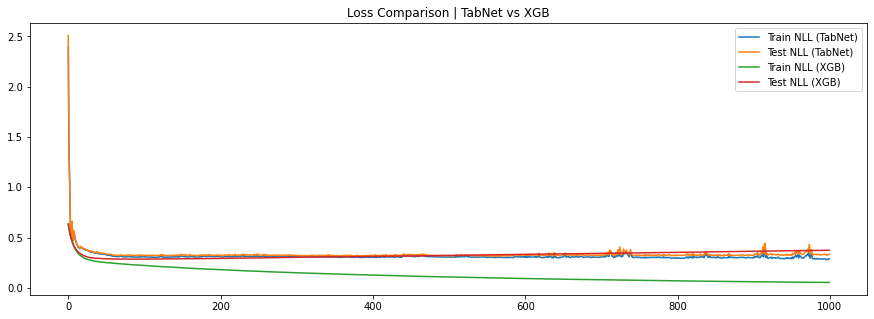

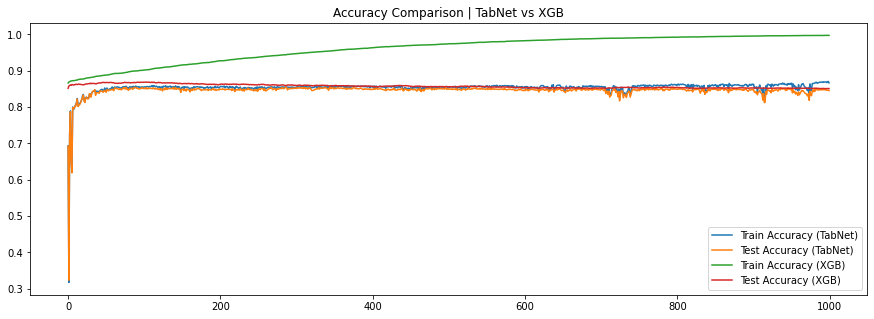

In [74]:
pd.concat([tabnet_losses, xgb_boost_losses], axis=1).plot(figsize=(15, 5), title=('Loss Comparison | TabNet vs XGB'))
plt.show()

pd.concat([tabnet_errors, xgb_boost_errors], axis=1).plot(figsize=(15, 5), title=('Accuracy Comparison | TabNet vs XGB'))
plt.show()